# Exploratory data analysis

Your task is to explore the dataset.

Help for the columns:
 - `SibSp` - number of sibling/spouses on the ship
 - `Parch` - number of parent/children on the ship
 - `Cabin` - the cabin they slept in (if they had a cabin)
 - `Embarked` - harbour of entering the ship
 - `Pclass` - passenger class (like on trains)



#### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not. 
Impute the missing values in a sensible way:
 - if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense
 - if in a row almost all the entries is missing, it worth to remove that given row
 - if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). 
 
The imputing method affects different machine learning models different way, but now we are interested only in EDA, so try to keep as much information as possible!



#### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.



#### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!



#### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.

Which feature seems to play the most important role in surviving/not surviving? Explain how and why could that feature be important! 



#### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)

--------------


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 1.

In [2]:
df = pd.read_csv('titanic.csv', header=0, sep=',')

print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Describe the numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Let's take a look at the missing values
df.isna() # isna = is not available

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

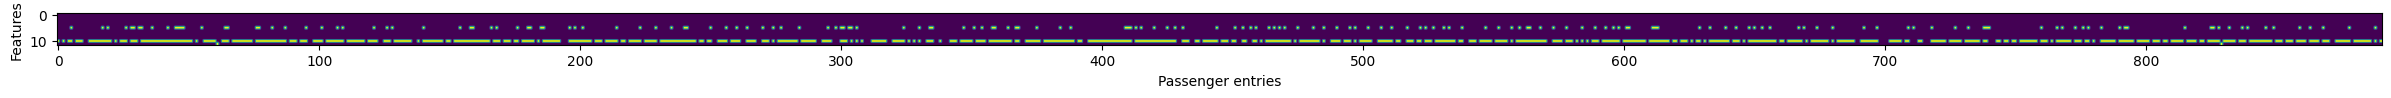

In [6]:
plt.figure(figsize=(30, 10))
plt.imshow(df.isna().T) # T = transpose, elfektetjük az álló mátrixot

plt.xlabel("Passenger entries")
plt.ylabel("Features")

plt.show()

Remarks:
- we have data for 891 passengers
- the numerical columns seams to be ok
- the age of 177 passengers is missing
- we do not have cabin ID for 687 passengers
- we do not have the harbour of entering for 2 passengers

### Exercise 2.

In [ ]:
# 0 = False
# 1 = True

In [18]:
num_passenger_class = 3
died_survive = [np.zeros(2) for i in range(num_passenger_class)]
died_survive = np.array(died_survive)
print(died_survive.shape)
died_survive

# column 0: died
# column 1: survived

(3, 2)


array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [19]:
for row in df.iterrows():
    index, data = row
    survived = data['Survived']
    pclass = data['Pclass']
    
    died_survive[pclass - 1][survived] += 1

In [20]:
died_survive

array([[ 80., 136.],
       [ 97.,  87.],
       [372., 119.]])

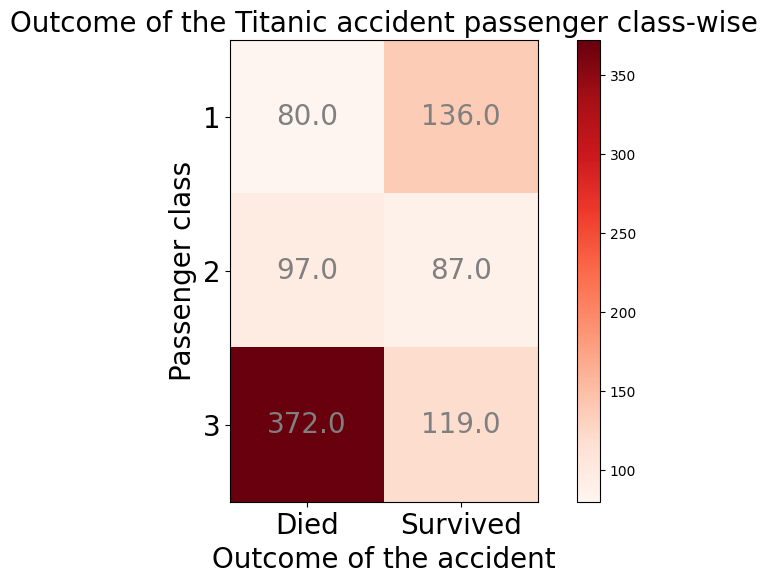

In [21]:
# Plot the created array as a heatmap (colored table)
fig, ax = plt.subplots(figsize=(10,6))                  # Creating figure with given figure size
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
im = plt.imshow(died_survive, cmap='Reds')              # Show the heatmap
cbar = ax.figure.colorbar(im)                           # Color bar for the heatmap
ax.set_xticks(np.arange(2))                             # Set xticks 
ax.set_xticklabels(['Died', 'Survived'], fontsize=20)   # Set xtick labels
ax.set_yticks(np.arange(3))                             # Set yticks
ax.set_yticklabels(['1', '2', '3'], fontsize=20)        # Set ytick labels
ax.set_ylabel('Passenger class', fontsize = 20)         # Set y label
ax.set_xlabel('Outcome of the accident', fontsize = 20) # Set x label
ax.set_title('Outcome of the Titanic accident passenger class-wise', fontsize = 20) # Figure title

# Set texts for the heatmap cells
for i in range(0,num_passenger_class):
    for j in range(0,2):
        text = ax.text(j, i, died_survive[i, j], ha="center", va="center", color="gray", fontsize = 20)
        
plt.show() # Show the plot

### Conclusions:
- This heatmap suggests that with a better passenger class, the chances for survival increase.